# * Kurapati Venkatesh

# * 09012021

# * Topic: Multiple Linear Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## An Analytics Company has been tasked by a crucial job of  finding out what factors does affect a startup company and will it be profitable to do so or not. For this they have collected some historical data and would like to apply supervised predictive learning algorithm such as Multilinear regression on it and provide brief insights about their data. Predict Profit, given different attributes for various startup companies.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model for profit of 50_startups data using multiple linear regression.

## -------------------------------------------------------------------------------------------

## 1. Importing libraries:

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Loading Dataset and checking information:

In [2]:
df = pd.read_csv(r"G:\360digit\assignments meterial\MLR\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#shape of our dataset
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#checking for missing data
df.isnull().sum()
#there is no missing value in the data

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


## 3. Visualising Dataset:

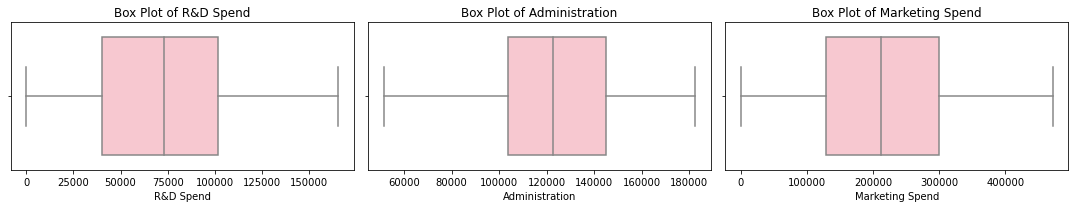

In [7]:
#Box Plot of independent variables an it seems we dont have outliers in our independent varables
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.boxplot(x=col,data=df,color='pink')
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

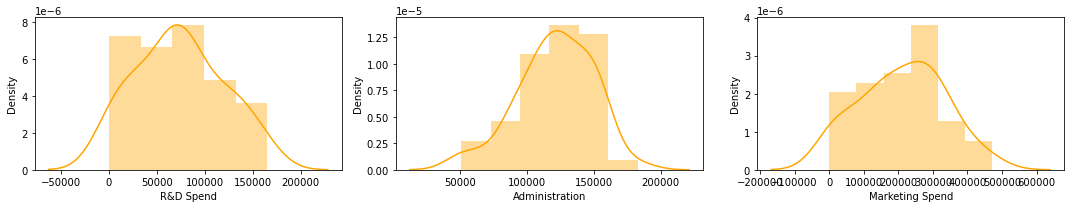

In [8]:
#Distribution Plot of independent variables an it seems  all variables are Normally distributed.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.distplot(a=df[col],color='orange')
    plt.tight_layout()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


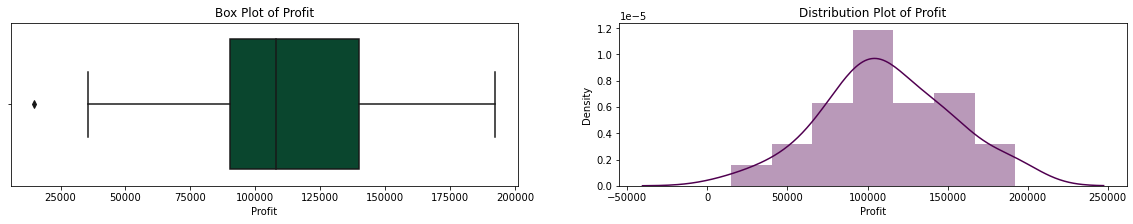

In [9]:
#Box Plot and Distribution Plot for Dependent variable PROFIT
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.Profit,color='#005030')
plt.title('Box Plot of Profit')

plt.subplot(1,2,2)
sns.distplot(a=df.Profit,color='#500050')
plt.title('Distribution Plot of Profit')
plt.show()

In [10]:
df[df['Profit']<25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


* This is the outlier, since we see the R&D is higly correlated to the Proft
* Here R&D spend is zero so its obious the profit is very low for this startup

In [11]:
df[df['R&D Spend']<10000]

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


- After observing above few startup data, We can say that for Index 49 (which is Outlier) there is some error in Profit
- typo error maybe. Sonce Profit for other startups with very R&D Spend is much higher than this
- We will be removing the outlier from the dataset

In [12]:
df.drop(index=49,axis=0,inplace=True)
df.shape

(49, 5)

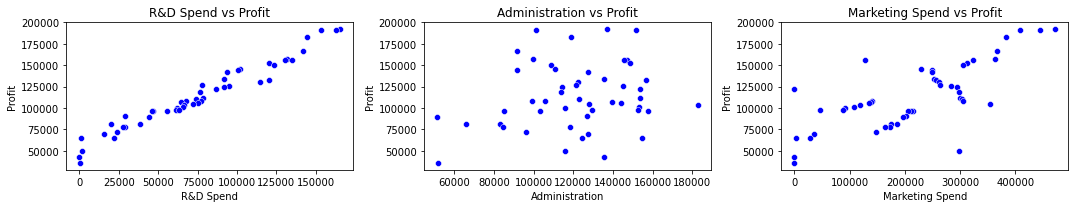

In [13]:
#Distribution Plot of independent variables an it seems  all variables are Normally distributed.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.scatterplot(x=col,y='Profit',data=df,color='blue')
    plt.title(f"{col} vs Profit")
    plt.tight_layout()

<AxesSubplot:title={'center':'Correlation Matrix'}>

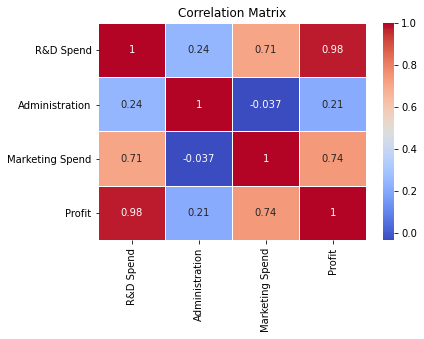

In [14]:
#we can see that R&D is highly linearly correalted with Profit
#let us look at correlation matrix
plt.title("Correlation Matrix")
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',linewidths=0.1)

* We can see that R&D Spend and Marketing Spend are 0.98 and 0.75 correlated with Profit which is very high.
* And Adminstration Spend is very less correlated, so we can drop that feature for buliding model.
* Also, we can see that R&D and Marketing are correlated with 0.72 which is high => Multicollinearity in independent variables.

We cannot have Multicollinearity in the dataset

Text(0.5, 1.0, 'R&D Spend vs Marketing Spend')

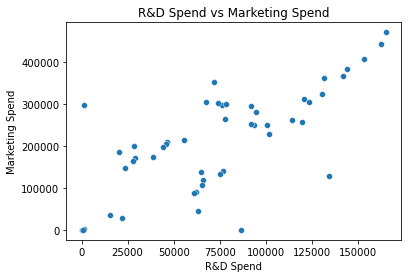

In [16]:
#This shows linear relationship between R&D Spend and Marketing Spend
sns.scatterplot(x='R&D Spend',y='Marketing Spend',data=df)
plt.title("R&D Spend vs Marketing Spend")

In [17]:
df1 = df.copy()
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 4. Wrangling Dataset:

In [18]:
#droping column Marketing Spend (because of Multicollinearity with R&D Spend) 
#droping column Adminstration(because of very low correlation with Proft)
df2 = df1.drop(columns=['Marketing Spend','Administration'],axis=1)
df2.head()

,R&D Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94


<AxesSubplot:>

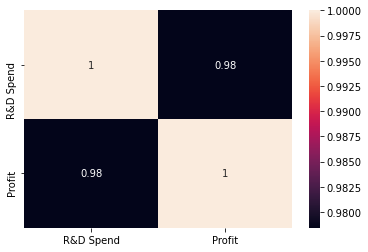

In [19]:
sns.heatmap(df2.corr(),annot=True)

In [20]:
#we have one Catgorical variable column also 'State'
#Lets explore and analyse it

df2.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [21]:
#There are three unique states and their counts are given below. They are equally distributed.

df2.groupby('State')['State'].count()

State
California    16
Florida       16
New York      17
Name: State, dtype: int64

In [22]:
#We will convert this column into dummy variables
df3 = pd.get_dummies(data=df2)
df3.head()

,R&D Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,192261.83,0,0,1
1,162597.70,191792.06,1,0,0
2,153441.51,191050.39,0,1,0
3,144372.41,182901.99,0,0,1
4,142107.34,166187.94,0,1,0


In [23]:
#To avoid dummy variable Trap, we will drop one dummy variable. Let us remove State_California
df4 = df3.drop(labels=['State_California'],axis=1)
df4.head()

,R&D Spend,Profit,State_Florida,State_New York
0,165349.20,192261.83,0,1
1,162597.70,191792.06,0,0
2,153441.51,191050.39,1,0
3,144372.41,182901.99,0,1
4,142107.34,166187.94,1,0


## 5. Splitting Dataset into Train and Test Set for ML model:

In [24]:
#Now we are done with data preprocessing steps
#Now will split our dataset into Dependent variable and Independent variable

X = df4.iloc[:,[0,2,3]].values
y = df4.iloc[:,1].values

In [25]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (49, 3)
Shape of Independent Variable y = (49,)


In [26]:
#Now we will spit our data into Train set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

In [27]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (39, 3)
Shape of X_test = (10, 3)
Shape of y_train = (39,)
Shape of y_test = (10,)


## 6. Building Linear Regression Model:

In [28]:
#Now we will build regression model on Training Set and Test it on our Test Set

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

LinearRegression()

In [29]:
#Now it's time to test the accuracy of the model on our Test Data
#this is very good accuracy on training set
lm.score(X_train,y_train)

0.9627751272930377

## 7. Model Evaluation:

In [32]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lm,X_train,y_train,cv=5)
print(f"Accuracies obtained from 5-cross validation = {accuracies}")
print(f'Mean of all accuracies = {accuracies.mean()}')
print(f"Standard Deviation of accuracies = {accuracies.std()}")

Accuracies obtained from 5-cross validation = [0.92253207 0.91428495 0.96311516 0.97224433 0.96787827]
Mean of all accuracies = 0.9480109545008519
Standard Deviation of accuracies = 0.02448150764411355


In [34]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=lm,param_grid={'normalize':[True,False]})
grid_search = grid_search.fit(X_train,y_train)
print(f"Best Parameter for our model is {grid_search.best_params_}")
print(f"Best score for the model is {grid_search.best_score_}")

Best Parameter for our model is {'normalize': True}
Best score for the model is 0.9480109545008595


In [35]:
# Taking best parameter
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

LinearRegression(normalize=True)

In [36]:
#Now it's time to test the accuracy of the model on our Test Data
#this is very good accuracy on training set
lm.score(X_train,y_train)

0.9627751272930376

In [37]:
#Now we can see how model performs on test dataset
y_pred = lm.predict(X_test)
data = {'y_test':y_test,'y_pred':y_pred.round(2)}
pd.DataFrame(data=data)

,y_test,y_pred
0,90708.19,73382.98
1,110352.25,112267.38
2,118474.03,114900.98
3,81229.06,63833.66
4,124266.90,127497.13
5,191792.06,188966.03
6,64926.08,47338.87
7,111313.02,113722.74
8,126992.93,116410.05
9,49490.75,49923.83


In [38]:
#coefficients of regression model
coeff = f'Profit = ({lm.intercept_} x Bias) '
for i,col in zip(range(3),df4.columns[[0,2,3]]):
    coeff+=f'+\n ({lm.coef_[i]} x {col}) '

print(coeff)

Profit = (49491.02605458812 x Bias) +
 (0.8577919938064326 x R&D Spend) +
 (-695.589939433861 x State_Florida) +
 (-3010.1465064603562 x State_New York) 


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residues')

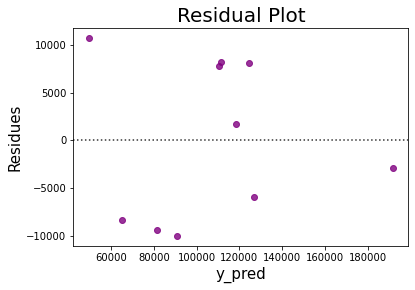

In [39]:
plt.title('Residual Plot',size=20)
sns.residplot(y_test,y_pred,color='purple')
plt.xlabel('y_pred',size=15)
plt.ylabel('Residues',size=15)

#we can not see any pattern in the plot => model is good

Text(0, 0.5, 'y_pred')

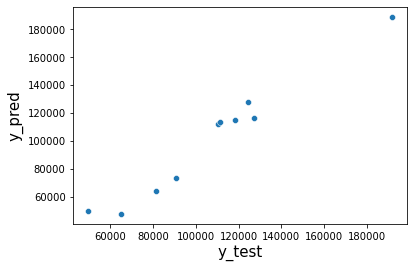

In [40]:
sns.scatterplot(y_test,y_pred)
plt.xlabel('y_test',size=15)
plt.ylabel('y_pred',size=15)

## 8. Interpreting Results:

In [41]:
from sklearn import metrics
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

R^2 = 0.9242380072119282
Adjusted R^2 = 0.8863570108178922


#### Our Linear Regression Model for Test Set gives

R^2 = 0.92

Adjusted R^2 = 0.87

##### Profit = (49491.02605460257 x Bias) + (0.8577919938062496 x R&D Spend) + (-695.5899394338772 x State_Florida) + (-3010.1465064603767 x State_New York)



#### Interpreting Coefficients:

1. It means that taking other variables constant, for every 1 unit increase in R&D Spent -> Profit INCREASE by 0.86 units.

2. Remaining other variables constant, if Startup operates in Florida -> Profit will DECREASE by 695.59 units.

3. Remaining other variables constant, if Startup operates in Nw York -> Profit will DECREASE by 3010.15 units.

## 9. Profit Calculator:

In [42]:
def predict_profit(rd_spent,state):
    s1=s2=0
    if state == 'Florida':
        s1=1
    elif state == 'New York':
        s2=1
    
    X = np.array([rd_spent,s1,s2]).reshape(1,3)
    return float(lm.predict(X))

In [43]:
rd_spent = float(input('Enter the R&D Spent: '))
state = input('Enter the state in which you operate: ')
print(f'\nExpected Profit will be {round(predict_profit(rd_spent,state),2)}')

Enter the R&D Spent: 162597.70
Enter the state in which you operate: California

Expected Profit will be 188966.03


## 10. Conclusion:

Step 1: We imported the data using Pandas.

Step 2: We read the data and checked the description and information about the data. We also looked for missing values.

Step 3: We then visualised the data through various plots like Distribution Plot, Box Blot and Scatter Plot and checked for if there exist any Outliers in out dataset or not. We saw that data is normally distributed for all features and eqi-distributed for State feature.

Step 4: We then did Feature Selection based on the how much they are correlated to our target variable Profit. We also found Multicollinearity between R&D Spent and Marketing Spent and we dropped Marketing Spent as R&D Spent was highly correlated than that.

Step 5: We then splitted our data first into Dependent and Independent Variables and then into Training Set and Test Set.

Step 6: We build Linear Regression Model using sklearn library on our Training Set.

Step 7: We then did Model Evaluation by applying k-Folf Cross Validation and did Grid Search to parameter tuning to get best paramerts for our model. Also we made Residual Plot to check if model is missing something or not and we didn't find any pattern in Residual Plot -> Model is good.

Step 8: Once we got best paramters ans score for our model, we run the model on Test set to see how well it predicts. We calculated R^2 which is 0.92 -> model predicts unseen data well enough.

Step 9: We made predict_profit calculator which takes two inputs 1. R&D Spent and 2. State in which they are operating. On the bais of these two parameters our model predicts Profit for that Startup and interpreted the regression coefficients.

After observing the whole model we can conclude that -

##### 1. Profit for a startup is highly dependent on how much they spend on R&D i.e Research and Development. Higher R&D Spent higher is the Profit and vica-versa.

##### 2. Start opearting in CALIFORNIA are expecting more Profit than operating in other two states 'Florida' and 'New York' with an assuption R&D Spent for all three states are same.

##### So based on the data provided and our Machine Learning Model we can say that it is Good to start a business in CALFORNIA (do consider other factors also which are not covered in the model)